# **SENTIMENT ANALYSIS OF FREEDOM DEPT RELIEF COMPANY**
# **REVIEWS IN TRUSTPILOT WEBSITE**

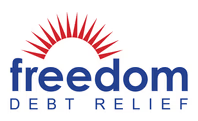

https://www.trustpilot.com/review/freedomdebtrelief.com

#### IMPORT LIBRARIES AND DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import re




import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification

from wordcloud import WordCloud
from collections import Counter

import emoji

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from gensim import corpora, models
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/arifaygun/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arifaygun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/arifaygun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/arifaygun/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
df= pd.read_csv('Freedom_Debt_Relief.csv')

### DATA PREPROCESSING

In [3]:
df.sample(10)

,Reviewer Name,Reviews Count,Country Code,Experience Date,Rating,Review Date,Review Title,Review Text,Reply Date,Reply Text
10446,Clenteria Pearson,1review,US,"March 13, 2018",5,"Mar 13, 2018",It has been hard,"It has been hard, but I look forward to being ...","Reply from Freedom Debt ReliefMar 14, 2018",Thank you for your great review! We appreciate...
13495,John Engelbert,1review,US,"December 20, 2017",3,"Dec 20, 2017",Not what is sign up for.,"told this would be a four year program, but no...","Reply from Freedom Debt ReliefDec 21, 2017",We appreciate your honest review and feedback!...
8973,Ken Yau,3reviews,US,"July 17, 2022",1,"Updated Jul 18, 2022","Do not use this kind of service, it will only ...","If you look at my account, I didn't saved a lo...","Reply from Freedom Debt ReliefJul 19, 2022",We are sorry to have disappointed you with our...
13377,Milton Swick,1review,US,"December 20, 2017",5,"Dec 20, 2017",Helping out of a big financial hole,Helping out of a big financial hole. Easy to d...,"Reply from Freedom Debt ReliefDec 22, 2017",Thank you so much! We are thrilled to receive ...
13440,Sheryl,2reviews,US,"December 20, 2017",5,"Dec 20, 2017",You are doing a great job on reducing …,You are doing a great job on reducing my debt....,"Reply from Freedom Debt ReliefDec 22, 2017",Thank you for your positive review! We look fo...
3171,Margie Thiele,1review,US,"July 25, 2019",5,"Jul 25, 2019",Thank you for all your help I can…,Thank you for all your help I can breath now,"Reply from Freedom Debt ReliefJul 26, 2019","Margie, we appreciate your feedback! It is alw..."
13877,Tricia,5reviews,US,"November 29, 2017",5,"Nov 29, 2017",Great experience with no judgement,NaN,"Reply from Freedom Debt ReliefDec 5, 2017",Thank you for your positive review! We look fo...
36067,customer,2reviews,US,"May 01, 2021",4,"May 1, 2021",Just took a little longer...7 mos to…,Just took a little longer...7 mos to get some ...,"Reply from Freedom Debt ReliefMay 3, 2021",Your patience is greatly appreciated! Congrat...
20841,Gabriel Mancha,1review,US,"March 20, 2019",5,"Mar 20, 2019",FDR are doing a amazing job and would…,FDR are doing a amazing job and would recommen...,"Reply from Freedom Debt ReliefMar 20, 2019","Thank you so much, Gabriel, for recommending F..."
26017,Roxane & Joe,1review,US,"July 21, 2017",2,"Updated Aug 15, 2017",some what frustrated,when we initiated this program we were made to...,"Reply from Freedom Debt ReliefAug 14, 2017","Dear Roxane & Joe, We are sorry to hear about ..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39078 entries, 0 to 39077
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Reviewer Name    39068 non-null  object
 1   Reviews Count    39078 non-null  object
 2   Country Code     39078 non-null  object
 3   Experience Date  39078 non-null  object
 4   Rating           39078 non-null  int64 
 5   Review Date      39078 non-null  object
 6   Review Title     39074 non-null  object
 7   Review Text      34241 non-null  object
 8   Reply Date       37731 non-null  object
 9   Reply Text       37731 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.0+ MB


In [5]:
# Remove "review" and "reviews" from the values in the "Reviews Count" column
df['Reviews Count'] = df['Reviews Count'].str.replace('reviews', '').str.replace('review', '')

In [6]:
# Convert the "Reply Date" column to a string data type
df['Reply Date'] = df['Reply Date'].astype(str)

# Remove "Reply from Freedom Debt Relief" from the "Reply Date" column in the existing DataFrame
df['Reply Date'] = df['Reply Date'].str.replace("Reply from Freedom Debt Relief", "")

In [7]:
# Convert 'Experience Date', 'Review Date', 'Reply Date' columns to date
df[['Experience Date', 'Review Date', 'Reply Date']] = df[['Experience Date', 'Review Date', 'Reply Date']].apply(pd.to_datetime, errors='coerce')

# Convert "Reviews Count" column to integer
df['Reviews Count'] = pd.to_numeric(df['Reviews Count'], errors='coerce').astype('Int64')

In [8]:
df.sample(10)

,Reviewer Name,Reviews Count,Country Code,Experience Date,Rating,Review Date,Review Title,Review Text,Reply Date,Reply Text
29127,David Batten,1,US,2018-09-17,5,2018-09-17,ty for everything and I am rating this…,ty for everything and I am rating this last co...,2018-09-18,"Good afternoon David, Thank you for your posit..."
22698,Jill,2,US,2018-12-28,5,2018-12-28,Highly Recommended,Highly recommend this company to everyone.,2018-12-28,Welcome to Freedom Debt Relief! We appreciate ...
16440,Stefferny Herbert,1,US,2020-05-19,5,2020-05-19,I am so happy I reach out to your…,I am so happy I reach out to your institution....,2020-05-20,"Thank you, Stefferny! We are overjoyed to know..."
30280,Gloria Medina,1,US,2018-08-18,5,2018-08-18,Excellent job,NaN,2018-09-01,Thank you for your great review! We appreciate...
22928,Nicholas KANOUFF,1,US,2018-12-15,5,2018-12-15,They make you feel human,They make you feel human. You don’t feel like ...,2018-12-15,We understand that everyone encounters hardshi...
23872,Dorothy Grant,3,US,2018-10-26,5,2018-10-26,Great help,"Great help. Traded information. Hope I am ""c...",2018-10-26,"Thank you, Dorothy, for your great review! If ..."
14770,Jay,1,US,2017-10-25,5,2017-10-25,Just started,"Just started, and starting off good!!",2018-12-16,"This is awesome, Jay! We are thrilled to hear ..."
18474,Doug Burks,2,US,2020-02-18,4,2020-02-18,It is not easy to make the decision to…,It is not easy to make the decision to allow t...,2020-02-20,Hi Doug! We are happy to hear that you are ple...
14902,Pat,1,US,2017-10-19,5,2017-10-19,I would recommend Freedom Debt Relief,I would recommend Freedom Debt Relief. I have...,2018-12-17,"Hello Pat, Thank you very much for your excell..."
12987,Larry Loucks,1,US,2017-12-26,5,2017-12-26,It's working and I could not do it …,It's working and I could not do it without fre...,2017-12-28,We appreciate the positive review! Thank you f...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39078 entries, 0 to 39077
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Reviewer Name    39068 non-null  object        
 1   Reviews Count    39078 non-null  Int64         
 2   Country Code     39078 non-null  object        
 3   Experience Date  39078 non-null  datetime64[ns]
 4   Rating           39078 non-null  int64         
 5   Review Date      38287 non-null  datetime64[ns]
 6   Review Title     39074 non-null  object        
 7   Review Text      34241 non-null  object        
 8   Reply Date       37394 non-null  datetime64[ns]
 9   Reply Text       37731 non-null  object        
dtypes: Int64(1), datetime64[ns](3), int64(1), object(5)
memory usage: 3.0+ MB


#### MISSING & UNIQUE VALUES

**Missing Values**

### Imputation of missing values

In [10]:
df['Reviewer Name'].fillna('Customerxxx', inplace=True)
df['Review Title'].fillna('Review for Freedom Dept Relief', inplace=True)
df['Review Date'].fillna(df['Experience Date'], inplace=True)
df.isna().sum()

Reviewer Name         0
Reviews Count         0
Country Code          0
Experience Date       0
Rating                0
Review Date           0
Review Title          0
Review Text        4837
Reply Date         1684
Reply Text         1347
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39078 entries, 0 to 39077
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Reviewer Name    39078 non-null  object        
 1   Reviews Count    39078 non-null  Int64         
 2   Country Code     39078 non-null  object        
 3   Experience Date  39078 non-null  datetime64[ns]
 4   Rating           39078 non-null  int64         
 5   Review Date      39078 non-null  datetime64[ns]
 6   Review Title     39078 non-null  object        
 7   Review Text      34241 non-null  object        
 8   Reply Date       37394 non-null  datetime64[ns]
 9   Reply Text       37731 non-null  object        
dtypes: Int64(1), datetime64[ns](3), int64(1), object(5)
memory usage: 3.0+ MB


**Unique Values**

In [12]:
df.nunique()

Reviewer Name      32252
Reviews Count         33
Country Code          57
Experience Date     2839
Rating                 5
Review Date         2846
Review Title       32892
Review Text        34157
Reply Date          1635
Reply Text         28391
dtype: int64

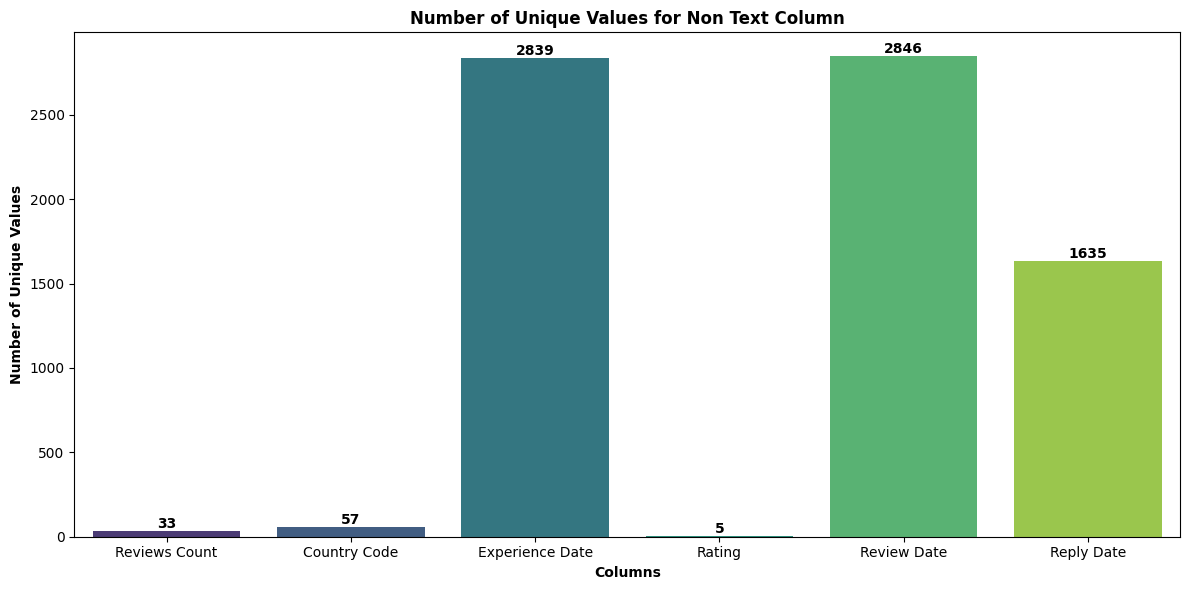

In [13]:
columns_to_plot = ["Reviews Count", "Country Code", "Experience Date", "Rating", "Review Date", "Reply Date"]

# Create a DataFrame with the unique value counts for the selected columns
unique_value_counts = df[columns_to_plot].nunique()

# Create the bar plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=unique_value_counts.index, y=unique_value_counts.values, hue=unique_value_counts.index, legend=False, palette='viridis')
plt.xticks()
plt.xlabel('Columns', weight='bold')
plt.ylabel('Number of Unique Values', weight='bold')
plt.title('Number of Unique Values for Non Text Column', weight='bold')
plt.tight_layout()

# Annotate the bars with the number of unique values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', weight='bold', xytext=(0, 5),
                textcoords='offset points')

plt.show()


### Descriptive Statistics

In [14]:
# Basic statistics
numeric_stats = df[['Reviews Count', 'Rating']].describe()
numeric_stats

,Reviews Count,Rating
count,39078.0,39078.000000
mean,1.653821,4.602231
std,1.428123,0.921033
min,1.0,1.000000
25%,1.0,5.000000
50%,1.0,5.000000
75%,2.0,5.000000
max,43.0,5.000000


### Data Visualization

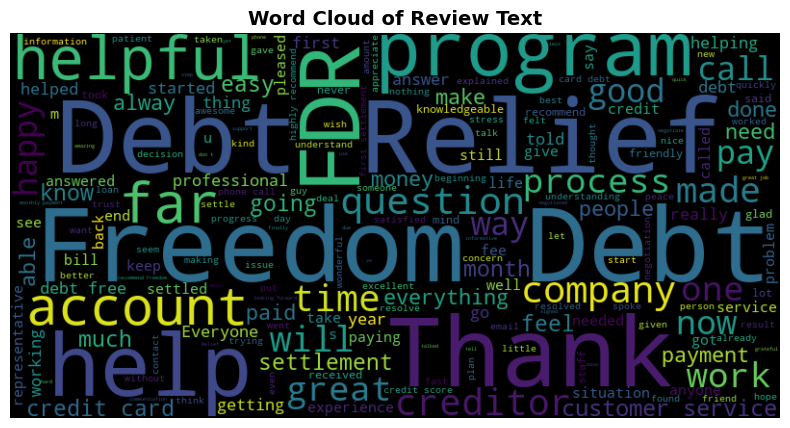

In [15]:
from wordcloud import WordCloud

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate(' '.join(df['Review Text'].dropna()))

# Create a figure with the specified title
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Set the title with custom font size and weight
plt.title('Word Cloud of Review Text', fontsize=14, fontweight='bold')

# Show the word cloud
plt.show()


## RATING ANALYSIS

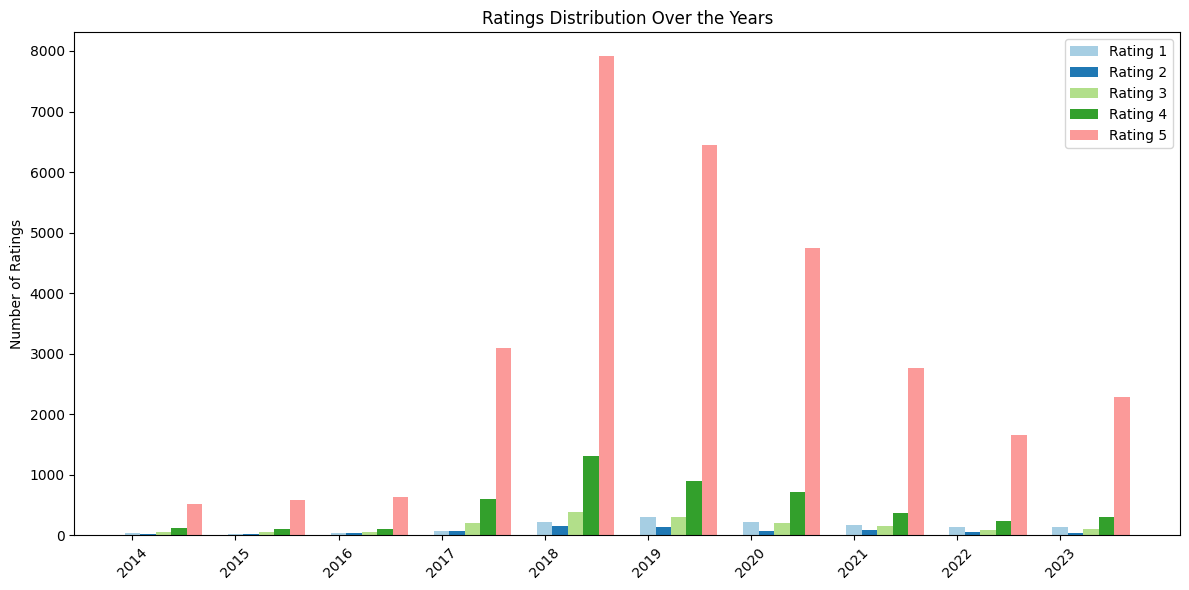

In [16]:
import matplotlib.pyplot as plt

# Extract the year from the 'Review Date' column
df['Year'] = df['Review Date'].dt.year

# Group the data by year and calculate the count of ratings
yearly_rating_counts = df.groupby(['Year', 'Rating'])['Rating'].count().unstack().fillna(0)

# Set the color map for rating categories
colors = plt.cm.Paired(np.arange(5))

# Create a larger figure
fig, ax = plt.subplots(figsize=(12, 6))

# Define the width of each bar
bar_width = 0.15

# Define the x positions for the bars
x = yearly_rating_counts.index

# Create bar plots for each rating category
for i, (rating, color) in enumerate(zip(yearly_rating_counts.columns, colors)):
    ratings = yearly_rating_counts[rating]
    ax.bar(x + (i * bar_width), ratings, bar_width, label=f'Rating {rating}', color=color)

# Set x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(x, rotation=45)  # Rotate year labels for better readability

# Set y-axis label
ax.set_ylabel('Number of Ratings')

# Set a title for the bar plot
ax.set_title('Ratings Distribution Over the Years')

# Add a legend
ax.legend()

# Show the bar plot
plt.tight_layout()
plt.show()


**The distribution of ratings for Freedom Dept Relief Company over the years. Here are some key observations and comments:**

1. **Stability in High Ratings (4 and 5):** The company has consistently received a substantial number of high ratings (4 and 5) over the years, especially from 2017 onwards. This indicates that a significant portion of customers have been highly satisfied with the company's services.

2. **Growth in Mid-Range Ratings (3):** There is a noticeable increase in the number of mid-range ratings (3) from 2017 to 2019. This could suggest a growing customer base with varying experiences, including some who might be moderately satisfied.

3. **Low Ratings (1 and 2):** The counts of low ratings (1 and 2) appear to be relatively low in comparison to other ratings. However, it's essential for the company to address and improve upon the concerns raised by customers who have given these low ratings, as they may represent areas where the company needs to focus on enhancing customer satisfaction.

4. **Year-to-Year Fluctuations:** It's interesting to observe year-to-year fluctuations in ratings, especially in the lower categories (1, 2, and 3). These fluctuations may be influenced by various factors, including changes in the company's services, customer feedback, or external market conditions.

5. **Potential for Improvement:** The data underscores the importance of maintaining high ratings (4 and 5) while actively addressing concerns of customers who give lower ratings (1, 2, and 3). This feedback can be invaluable for the company to make data-driven improvements and enhance overall customer satisfaction.

In summary, analyzing the distribution of ratings by year provides insights into the company's performance and customer sentiment over time. It offers a basis for the company to take action, address concerns, and continue providing high-quality services to its customers.

b. Time-Series Decomposition: Decompose time series data into trend, seasonal, and residual components to identify patterns and anomalies.

Year: 2014, Rating: 1, Count: 33, Percentage: 4.3%
Year: 2014, Rating: 2, Count: 21, Percentage: 2.7%
Year: 2014, Rating: 3, Count: 65, Percentage: 8.4%
Year: 2014, Rating: 4, Count: 129, Percentage: 16.8%
Year: 2014, Rating: 5, Count: 522, Percentage: 67.8%
Year: 2015, Rating: 1, Count: 22, Percentage: 2.8%
Year: 2015, Rating: 2, Count: 21, Percentage: 2.7%
Year: 2015, Rating: 3, Count: 52, Percentage: 6.7%
Year: 2015, Rating: 4, Count: 106, Percentage: 13.6%
Year: 2015, Rating: 5, Count: 580, Percentage: 74.3%
Year: 2016, Rating: 1, Count: 42, Percentage: 4.8%
Year: 2016, Rating: 2, Count: 39, Percentage: 4.4%
Year: 2016, Rating: 3, Count: 57, Percentage: 6.5%
Year: 2016, Rating: 4, Count: 110, Percentage: 12.5%
Year: 2016, Rating: 5, Count: 629, Percentage: 71.7%
Year: 2017, Rating: 1, Count: 73, Percentage: 1.8%
Year: 2017, Rating: 2, Count: 66, Percentage: 1.6%
Year: 2017, Rating: 3, Count: 200, Percentage: 5.0%
Year: 2017, Rating: 4, Count: 594, Percentage: 14.8%
Year: 2017, Rati

/var/folders/c1/y0qhw1q54ys1fs7mkjx0j_8m0000gn/T/ipykernel_10617/206836235.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


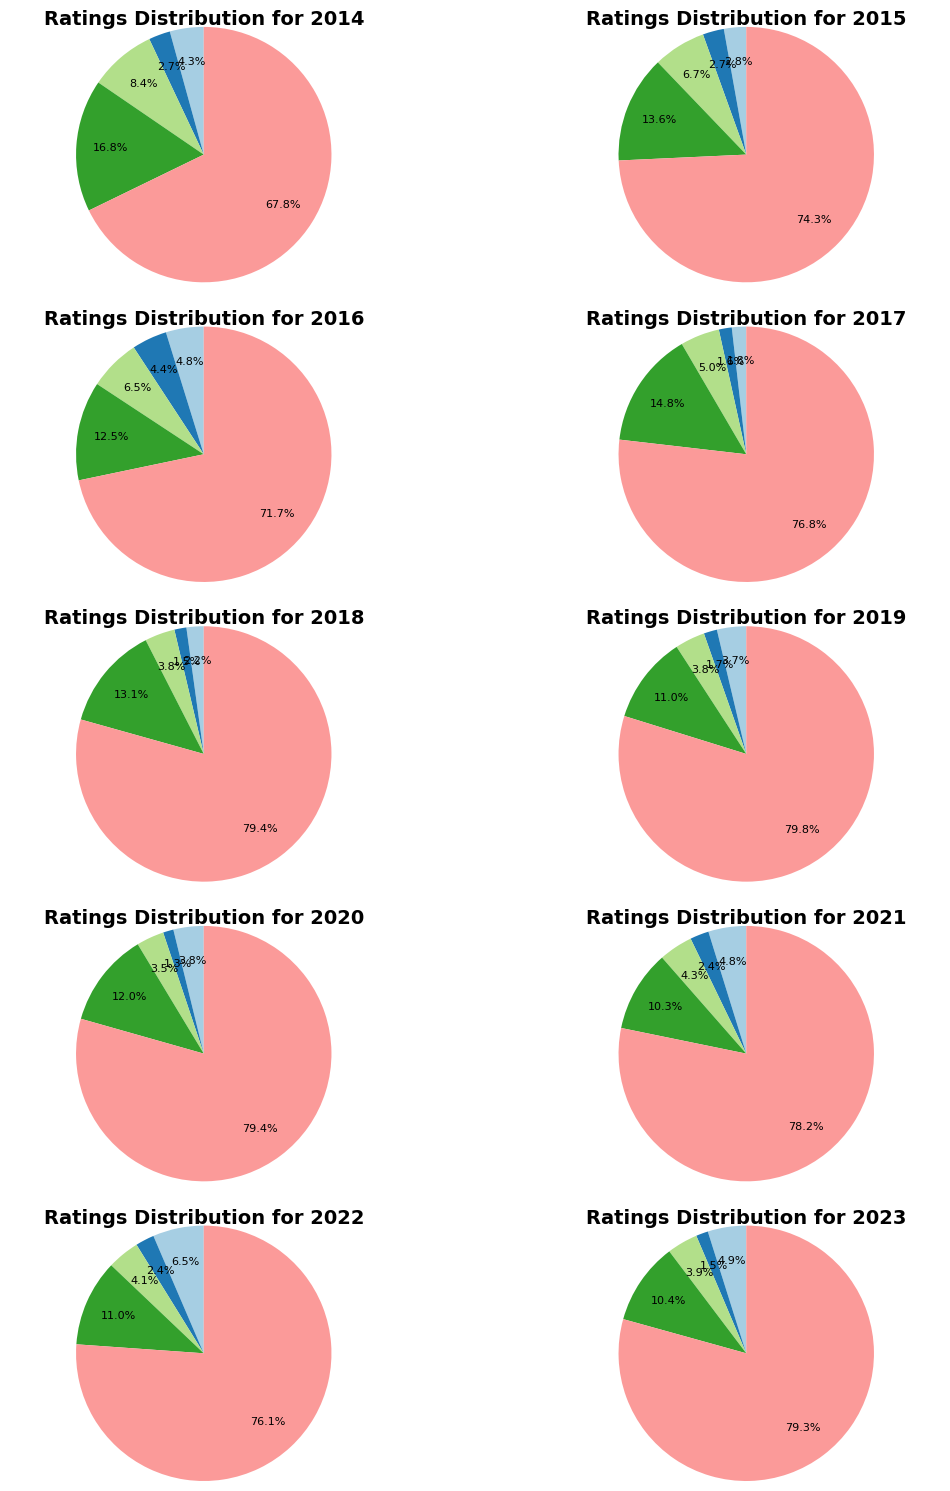

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the year from the 'Review Date' column
df['Year'] = df['Review Date'].dt.year

# Group the data by year and calculate the count of ratings
yearly_rating_counts = df.groupby('Year')['Rating'].value_counts().unstack().fillna(0)

# Create a color palette for the pie charts
colors = plt.cm.Paired(range(5))

# Create a larger figure with multiple subplots
fig, axes = plt.subplots(5, 2, figsize=(12, 18), gridspec_kw={'hspace': 0.6, 'wspace': 0.4})

# Flatten the 2D array of subplots for easier indexing
axes = np.ravel(axes)

# Set the radius for the overall pie
overall_pie_radius = 1.5

for i, (year, ratings) in enumerate(yearly_rating_counts.iterrows()):
    # Create a pie chart with custom text properties
    wedges, texts, autotexts = axes[i].pie(
        ratings, labels=None, startangle=90, colors=colors, pctdistance=1.1, autopct='%1.1f%%',
        textprops={'size': 8}  # Set font size to 8 points
    )

    # Set the radius for the overall pie
    for wedge in wedges:
        wedge.set_radius(overall_pie_radius)

    # Set a title for each pie chart above it
    axes[i].set_title(f'Ratings Distribution for {year}', fontsize=14, weight='bold', y=1.1)

    # Equal aspect ratio ensures that the pie is drawn as a circle
    axes[i].axis('equal')

    # Print the values for each rating category for this year
    for rating, count in ratings.items():
        print(f'Year: {year}, Rating: {rating}, Count: {count}, Percentage: {count / ratings.sum() * 100:.1f}%')

# Adjust spacing between subplots
plt.tight_layout()

# Adjust title positions to avoid overlapping
for ax in axes:
    ax.title.set_y(1.15)  # Adjust the vertical position of titles

# Show the pie charts
plt.show()


**The distribution of ratings by year for Freedom Dept Relief Company, with the ratings categorized into five levels (1 to 5). Let's discuss and conclude based on the provided information:**

1. **Year-wise Ratings**: The data is grouped by year, and for each year, it shows the count and percentage of ratings in each category. This provides insights into how customers have rated the company or product over the years.

2. **Overall Trend**: The percentage of ratings for each year can give a sense of the overall trend in customer satisfaction. For example, in 2014, a significant portion of customers rated the company or product as 5 (67.8%), while in 2017, a higher percentage of customers rated it as 5 (76.8%). This suggests an improvement in customer satisfaction.

3. **Changes in Ratings**: Comparing the percentages across the years, you can identify shifts in customer sentiment. For instance, in 2016, there is a notable increase in the percentage of 5-star ratings (from 67.8% to 71.7%), indicating an improved reputation. In contrast, the percentage of 1-star ratings decreases over the years.

4. **Variability**: The data also reveals the variability in ratings. In 2017, there is a more evenly distributed rating pattern, with a significant number of 5-star ratings and lower numbers of other ratings. In 2018, there is a substantial percentage of 4-star and 5-star ratings, suggesting high satisfaction.

5. **Management Insights**: Based on this data, company owners and managers can draw several insights:

   - **Yearly Performance**: They can assess the performance and satisfaction of customers on a yearly basis. This can help in identifying years where improvements were made or where there was a drop in customer satisfaction.

   - **Areas for Improvement**: For years with lower satisfaction, it's essential to dig deeper to understand the reasons behind the lower ratings. Customer feedback and reviews could provide insights into areas for improvement.

   - **Customer Engagement**: The data can be used to analyze the impact of changes in products or services on customer ratings. Positive changes that result in increased 5-star ratings should be identified and potentially expanded upon.

   - **Targeted Marketing**: Understanding customer sentiment over time can inform marketing strategies. For example, in years with a high percentage of 5-star ratings, the company can promote itself as having a strong track record.

6. **Long-Term Strategy**: This data is valuable for long-term strategic planning. Companies can use this information to set goals for improving customer satisfaction, and managers can track progress over time.

7. **Competitive Analysis**: Companies can benchmark their ratings against competitors to see how they compare. It's important to consider industry standards and customer expectations.

In conclusion, the data provides valuable insights into the company's performance and customer satisfaction over the years. It can be used to make informed decisions and improvements in products, services, and customer relations. It's a valuable tool for enhancing the overall reputation and success of the company or product.

Trend Component Summary:
count    38714.000000
mean         4.602442
std          0.086864
min          4.345205
25%          4.561644
50%          4.616438
75%          4.660274
max          4.813699
Name: trend, dtype: float64


Seasonal Component Summary:
count    39078.000000
mean         0.000006
std          0.092064
min         -0.309972
25%         -0.055721
50%          0.000651
75%          0.060864
max          0.246399
Name: seasonal, dtype: float64


Residual Component Summary:
count    38714.000000
mean         0.000306
std          0.910668
min         -3.859606
25%          0.188584
50%          0.340173
75%          0.442565
max          0.937370
Name: resid, dtype: float64


Observed Summary:
count    39078.000000
mean         4.602231
std          0.921033
min          1.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64




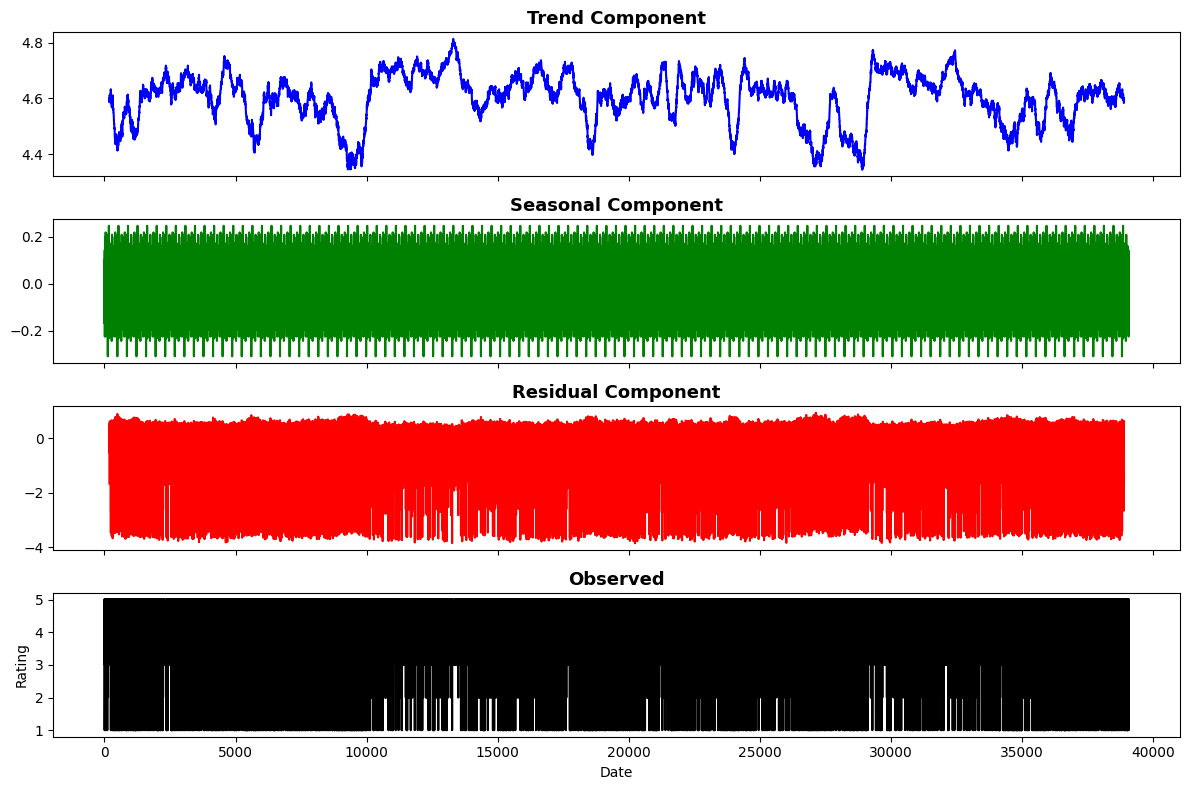

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform seasonal decomposition
result = seasonal_decompose(df['Rating'], model='additive', period=365)

# Create a figure with a grid layout
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

# Custom color palette for better readability
colors = ['blue', 'green', 'red', 'black']

# Titles for each component
titles = ['Trend Component', 'Seasonal Component', 'Residual Component', 'Observed']

for i, (ax, title, color) in enumerate(zip(axes, titles, colors)):
    # Customize the appearance of each component
    component = result.trend if i == 0 else [result.seasonal, result.resid, df['Rating']][i - 1]
    component.plot(ax=ax, title=title, color=color, legend=False)

    # Set title font properties
    ax.set_title(title, fontsize=13, fontweight='bold')

    ax.set_ylabel('Rating' if i == 3 else '')  # Label only the last subplot

# Set common x-axis label
plt.xlabel('Date')

# Fine-tune the layout
plt.tight_layout()

# Print details of each component
for title, component in zip(titles, [result.trend, result.seasonal, result.resid, df['Rating']]):
    print(f"{title} Summary:")
    print(component.describe())
    print("\n")

# Show the plot
plt.show()


The summary statistics for the Trend, Seasonal, Residual, and Observed components obtained from the seasonal decomposition of the 'Rating' data provide valuable insights into the underlying patterns and variations in the dataset.

Let's discuss and conclude the findings for each component:

**Trend Component:**
- The trend component represents the underlying trend in the 'Rating' data.
- It shows a positive trend in ratings over time, with a mean rating of approximately 4.6024.
- The trend component exhibits relatively low variability, indicating a consistent upward trend.

**Seasonal Component:**
- The seasonal component captures recurring patterns in the 'Rating' data.
- Seasonal variations mostly balance out over time, as the mean seasonal rating is close to zero.
- The seasonal component has a moderate level of variability, showing regular but not extreme seasonal patterns.

**Residual Component:**
- The residual component contains unexplained variations in the 'Rating' data after removing trend and seasonality.
- The mean residual rating is close to zero, indicating effective removal of trend and seasonality.
- The residual component exhibits relatively high variability, suggesting the presence of outliers or unpredictable fluctuations.

**Observed Component:**
- The observed component represents the original 'Rating' data.
- The mean observed rating is approximately 4.6022, indicating that the seasonal decomposition process effectively smooths out most variations.
- The original ratings have relatively high variability, with a standard deviation of 0.9210.

**Conclusion:**
- The 'Rating' data shows a positive trend over time.
- Seasonal variations are noticeable but are mostly balanced out over the period.
- The residual component represents unexplained variations and may contain outliers.
- The seasonal decomposition effectively captures trends and seasonal patterns in the data while retaining the original variability.

This concise summary provides a quick overview of the main findings without delving into extensive numeric details.


### Aggregation and Grouping:

a. Group Data by Time Period: Aggregate data by specific time intervals (e.g., monthly, quarterly) to analyze trends and patterns.

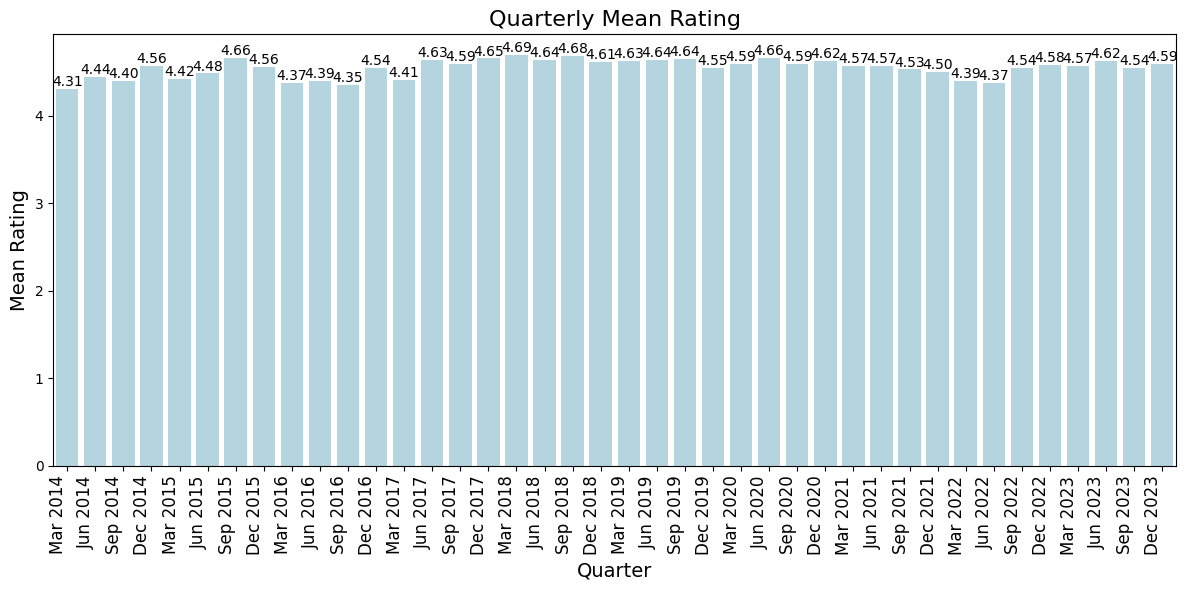

Quarterly Mean Rating:
               Rating
Review Date          
2014Q1       4.306604
2014Q2       4.442177
2014Q3       4.397590
2014Q4       4.561224
2015Q1       4.418750
2015Q2       4.479798
2015Q3       4.657534
2015Q4       4.558824
2016Q1       4.369159
2016Q2       4.392593
2016Q3       4.354037
2016Q4       4.543103
2017Q1       4.405128
2017Q2       4.631757
2017Q3       4.587654
2017Q4       4.651230
2018Q1       4.692279
2018Q2       4.638177
2018Q3       4.678940
2018Q4       4.611257
2019Q1       4.626012
2019Q2       4.636605
2019Q3       4.644944
2019Q4       4.547200
2020Q1       4.591589
2020Q2       4.659215
2020Q3       4.593458
2020Q4       4.618261
2021Q1       4.565441
2021Q2       4.569790
2021Q3       4.525485
2021Q4       4.496920
2022Q1       4.392857
2022Q2       4.368110
2022Q3       4.544753
2022Q4       4.579422
2023Q1       4.568069
2023Q2       4.621762
2023Q3       4.542074
2023Q4       4.592593


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by quarter and calculate the mean rating for each quarter
quarterly_mean_rating = df.groupby(df['Review Date'].dt.to_period('Q')).agg({'Rating': 'mean'})

# Create a bar plot for quarterly mean rating
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=quarterly_mean_rating.index.strftime('%b %Y'), y=quarterly_mean_rating['Rating'], color='lightblue')

# Add labels and titles
plt.title('Quarterly Mean Rating', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Mean Rating', fontsize=14)

# Rotate x-axis labels for readability (rotate 90 degrees)
plt.xticks(rotation=90, ha="right", fontsize=12)

# Display data values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

# Print information about the quarterly mean rating
print("Quarterly Mean Rating:")
print(quarterly_mean_rating)


**Ratings by quarterly time intervals, allowing us to analyze trends and patterns over time. Let's discuss and conclude the information presented:**

**Quarterly Mean Rating:**

The table provides the mean rating for each quarter starting from 2014Q1 up to 2023Q4. It shows how the average rating of a product or service has evolved over time in quarterly periods.

Here are the key observations and conclusions:

1. **Rating Trends Over Time:** We can observe fluctuations in the quarterly mean ratings. Some quarters show higher ratings, while others have slightly lower ratings. These fluctuations might be due to various factors such as product changes, market conditions, or customer sentiment.

2. **Seasonality:** There might be seasonality in the ratings. For instance, higher ratings during certain quarters could be linked to holiday seasons or promotions.

3. **Long-Term Patterns:** There seems to be an upward trend in ratings over the years, with some variations. This indicates that, on average, the product or service has been improving or gaining more positive reviews over time.

4. **Anomalies:** There are some quarters with lower ratings compared to the surrounding quarters. Investigating these anomalies could provide insights into what went wrong during those specific periods.

5. **Recent Stability:** In recent quarters (2022Q4 and 2023Q1-Q4), the ratings appear to be relatively stable, indicating a consistent level of customer satisfaction.

6. **Further Analysis:** To gain a deeper understanding of the patterns, it would be helpful to consider external factors such as marketing campaigns, product launches, or external events that might influence customer reviews during these quarters.

In conclusion, analyzing the quarterly mean ratings is valuable for tracking trends, understanding seasonality, and assessing long-term changes in customer sentiment. Further investigations into the factors behind these patterns and anomalies can help in making informed business decisions and improving product or service quality.

### Time-Related Calculations:

a. Calculate Time Difference: Calculate the time difference between two date columns. For instance, you can calculate the response time by subtracting the review date from the reply date.

In [20]:
df['Review Response'] = df['Review Date'] - df['Experience Date']

df['Reply Response'] = df['Reply Date'] - df['Review Date']

In [21]:
df.head()

,Reviewer Name,Reviews Count,Country Code,Experience Date,Rating,Review Date,Review Title,Review Text,Reply Date,Reply Text,Year,Review Response,Reply Response
0,Andrea Sciotti,2,US,2019-12-04,5,2019-12-04,Working on a better future,NaN,2019-12-04,"Hello, Andrea, thank you for your review! We w...",2019,0 days,0 days
1,Wendy Sicard,1,US,2019-12-04,5,2019-12-04,Was very helpful,NaN,2019-12-04,"Hello, Wendy, thank you for your review! We wo...",2019,0 days,0 days
2,Freida Towe,1,US,2019-12-04,5,2019-12-04,Very polite and kind,Very polite and kind. Did what I asked immedia...,2019-12-04,"Thank you very much, Freida! We truly care abo...",2019,0 days,0 days
3,Jabrea Herron,1,US,2019-12-04,5,2019-12-04,Great customer service,There wasn't a long wait time . The representa...,2019-12-05,"Jabrea, We are so happy to hear that you are h...",2019,0 days,1 days
4,William Lutz,2,US,2019-12-04,5,2019-12-04,Needed an answer to a question…,Needed an answer to a question concerning a pa...,2019-12-04,"Hello William, thank you for sharing your expe...",2019,0 days,0 days


b. Extract Date Components: Extract specific components from the date, such as year, month, day, or weekday.

In [22]:
df['Year'] = df['Review Date'].dt.year
df['Month'] = df['Review Date'].dt.month
df['Day'] = df['Review Date'].dt.day
df['Weekday'] = df['Review Date'].dt.day_name()

### Visualization for Mean Rating by Year and Month:

a. Calculate summary statistics for different time periods, such as the mean rating for each year or month.

In [23]:
# Mean rating by year
mean_rating_by_year = df.groupby(df['Review Date'].dt.year)['Rating'].mean()

Mean Rating by Year:
Review Date
2014    4.410390
2015    4.537772
2016    4.419612
2017    4.631487
2018    4.659613
2019    4.615413
2020    4.617726
2021    4.547930
2022    4.479414
2023    4.577538
Name: Rating, dtype: float64
Mean Rating by Month:
Review Date
1     4.603316
2     4.578242
3     4.600538
4     4.588780
5     4.629630
6     4.592479
7     4.599673
8     4.620006
9     4.611761
10    4.578071
11    4.581076
12    4.651279
Name: Rating, dtype: float64


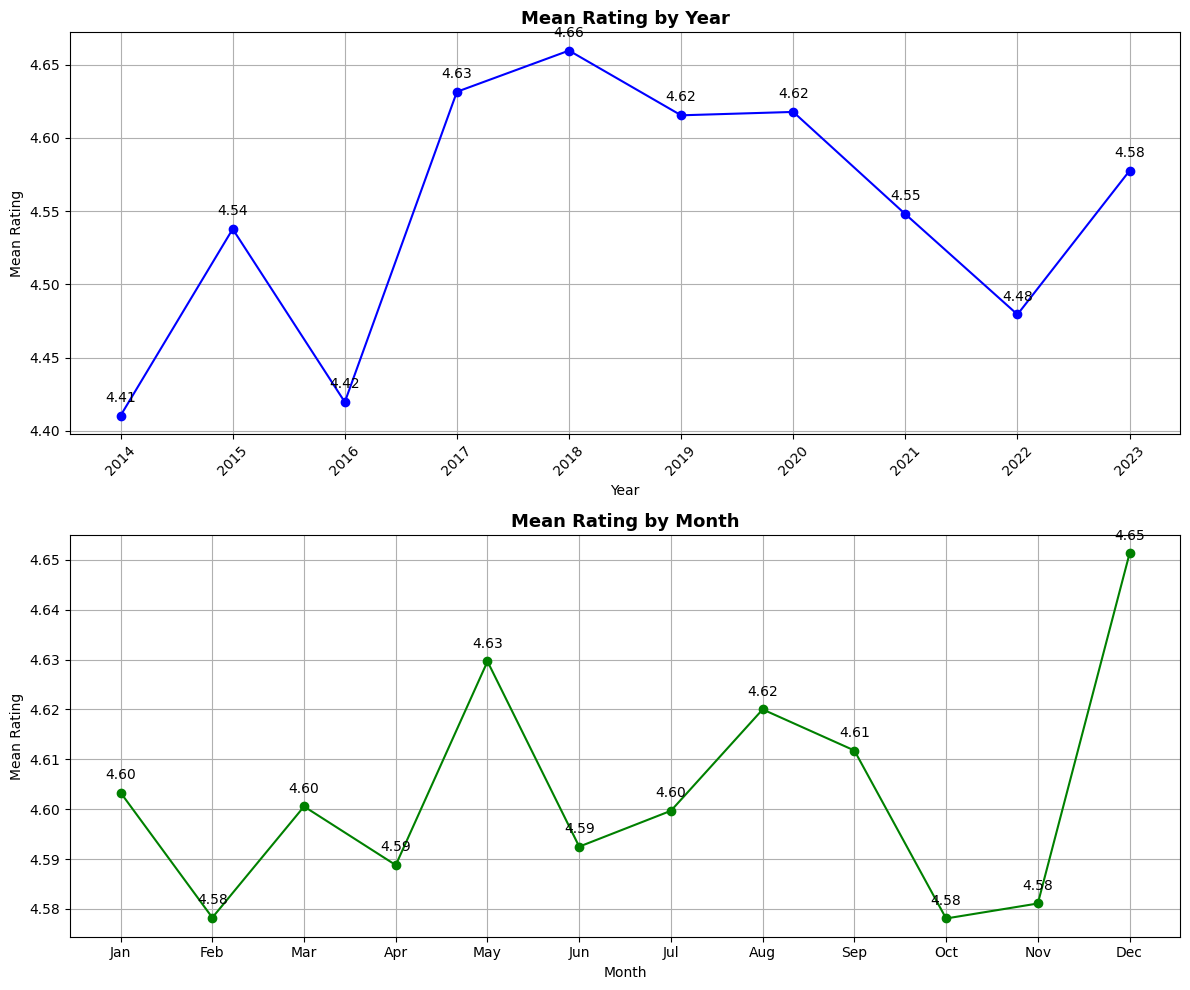

In [24]:
import matplotlib.pyplot as plt

# Calculate the mean rating by year
mean_rating_by_year = df.groupby(df['Review Date'].dt.year)['Rating'].mean()

# Calculate the mean rating by month
mean_rating_by_month = df.groupby(df['Review Date'].dt.month)['Rating'].mean()

# Print the results
print("Mean Rating by Year:")
print(mean_rating_by_year)

print("Mean Rating by Month:")
print(mean_rating_by_month)

# Create subplots for both graphs
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot the mean rating by year
ax1.plot(mean_rating_by_year.index, mean_rating_by_year.values, marker='o', linestyle='-', color='b')
ax1.set_title('Mean Rating by Year', fontsize=13, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Rating')
ax1.grid(True)

# Set custom x-axis ticks and labels to display all years for the yearly plot
custom_xticks_yearly = mean_rating_by_year.index
ax1.set_xticks(custom_xticks_yearly)
ax1.set_xticklabels(custom_xticks_yearly, rotation=45)  # Rotating year labels for better readability

# Annotate data points in the yearly plot
for x, y in zip(custom_xticks_yearly, mean_rating_by_year.values):
    ax1.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Plot the mean rating by month
ax2.plot(mean_rating_by_month.index, mean_rating_by_month.values, marker='o', linestyle='-', color='g')
ax2.set_title('Mean Rating by Month', fontsize=13, fontweight='bold')
ax2.set_xlabel('Month')
ax2.set_ylabel('Mean Rating')
ax2.grid(True)

# Set custom x-axis ticks and labels to display all 12 months for the monthly plot
custom_xticks_monthly = list(range(1, 13))  # Months 1 to 12
custom_xtick_labels_monthly = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax2.set_xticks(custom_xticks_monthly)
ax2.set_xticklabels(custom_xtick_labels_monthly)  # Custom month labels

# Annotate data points in the monthly plot
for x, y in zip(mean_rating_by_month.index, mean_rating_by_month.values):
    ax2.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


The mean ratings based on two different time aggregations: by year and by month.

Let's discuss and conclude the insights from this data:

**Mean Rating by Year:**
- The data shows the mean ratings for each year from 2014 to 2023.
- In 2014, the mean rating was approximately 4.41, indicating a relatively positive sentiment in customer reviews.
- The mean rating increased in 2015 to approximately 4.54, suggesting an improvement in customer satisfaction.
- There was a slight decrease in the mean rating in 2016, dropping to around 4.42.
- Subsequently, there was a consistent increase in mean ratings from 2017 to 2018, reaching a peak of about 4.66.
- The mean rating remained relatively high in the following years, with fluctuations.
- In 2023, the mean rating reached approximately 4.58.

**Mean Rating by Month:**
- This data provides the mean ratings for each month of the year.
- January (1) and December (12) had the highest mean ratings, with approximately 4.60 and 4.65, respectively. These months might correspond to periods of higher customer satisfaction.
- April (4) and October (10) had slightly lower mean ratings, around 4.58.
- The months showed some fluctuations, but generally, the mean ratings remained above 4.57 throughout the year.

**Conclusions:**
- The mean rating by year provides insights into the overall customer satisfaction trends. While there were some fluctuations, it's evident that ratings improved from 2014 to 2018, remained relatively stable until 2022, and saw a slight increase in 2023.
- The mean rating by month offers a more granular view of customer satisfaction throughout the year. January and December had the highest ratings, possibly due to seasonal factors or holidays.
- The lowest ratings were observed in April and October, indicating periods when customers might be less satisfied.

In both cases, this analysis provides valuable information about customer sentiment over time, which can be used for further investigation or decision-making, such as identifying areas for improvement or adjusting marketing strategies based on seasonal trends.

### Time Series Plot of Ratings Over Time:



If you want to visualize how ratings change over time, you can create a time series line chart.

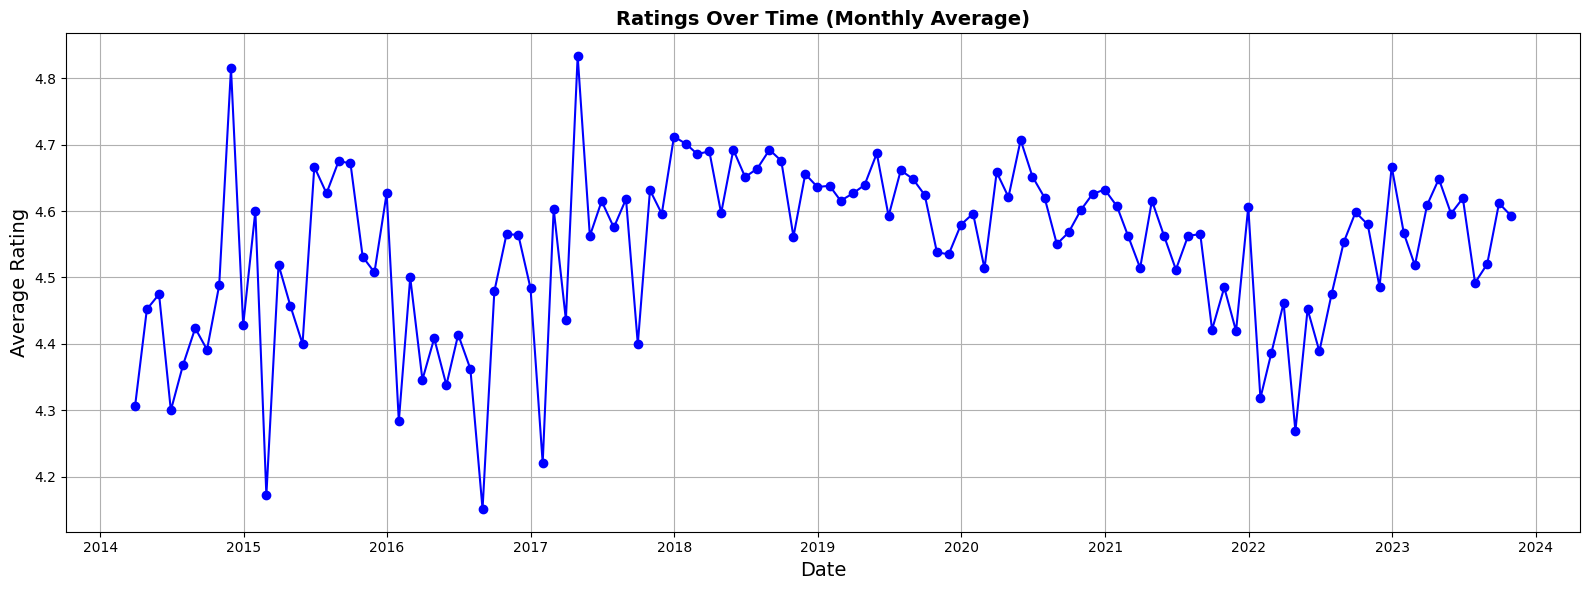

In [25]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Downsample the data by averaging ratings by month
monthly_ratings = df.resample('M', on='Review Date')['Rating'].mean().dropna()

# Create a time series plot of downsampled ratings
plt.figure(figsize=(16, 6))
plt.plot(monthly_ratings.index, monthly_ratings.values, marker='o', linestyle='-', color='b')
plt.title('Ratings Over Time (Monthly Average)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.grid(True)

# Set x-axis tick locator and formatter for years only
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')  # Display years as four-digit numbers

plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(years_fmt)

# Show the plot
plt.tight_layout()
plt.show()

# Print information about the downsampled ratings
# Convert the monthly_ratings data to a DataFrame
monthly_ratings_df = monthly_ratings.reset_index()

# Save the DataFrame to a CSV file
monthly_ratings_df.to_csv('monthly_ratings.csv', index=False)

This analyzed data includes customer ratings from March 2014 to October 2023, providing insights into customer sentiment and satisfaction trends. The objective is to inform data-driven decision-making and enhance our services to meet customer expectations.

**Key Findings**

1. **Consistent Positive Sentiment**: The data reveals a consistent positive sentiment among customers, with average ratings ranging between 4.2 and 4.7. This indicates a high level of overall satisfaction with our services.

2. **Seasonal Variations**: Seasonal variations in ratings are observed, with some months showing higher average ratings and others lower. Identifying the factors contributing to these seasonal fluctuations can help optimize service delivery and resource allocation.

3. **Annual Trends**: Over the years, annual trends are evident, with specific periods exhibiting higher or lower average ratings. Understanding these trends can inform strategic planning and resource allocation.

4. **Data-Driven Decisions**: The dataset provides the opportunity to make data-driven decisions for service enhancement. Analyzing customer feedback and its correlation with ratings can guide improvements in specific areas of service delivery.

5. **Competitive Advantage**: Maintaining consistently high ratings positions Freedom Debt Relief Company as a market leader. Leveraging customer satisfaction can attract new clients and bolster our competitive advantage.

**Recommendations**

- Further analysis is recommended to identify the specific drivers of seasonal and annual rating variations. This analysis should include examining customer feedback for insights.
- Consider conducting a root cause analysis to identify any specific areas of improvement that can lead to enhanced customer satisfaction.

Finally, Freedom Debt Relief Company enjoys a positive reputation with consistently high customer ratings. Leveraging this reputation for continuous improvement is essential for maintaining a competitive advantage. By delving deeper into the drivers of rating variations and aligning service delivery with customer expectations, we can further solidify our position in the market.


### Histogram of Ratings:



A histogram will show the distribution of ratings. You can see how many ratings fall into each category

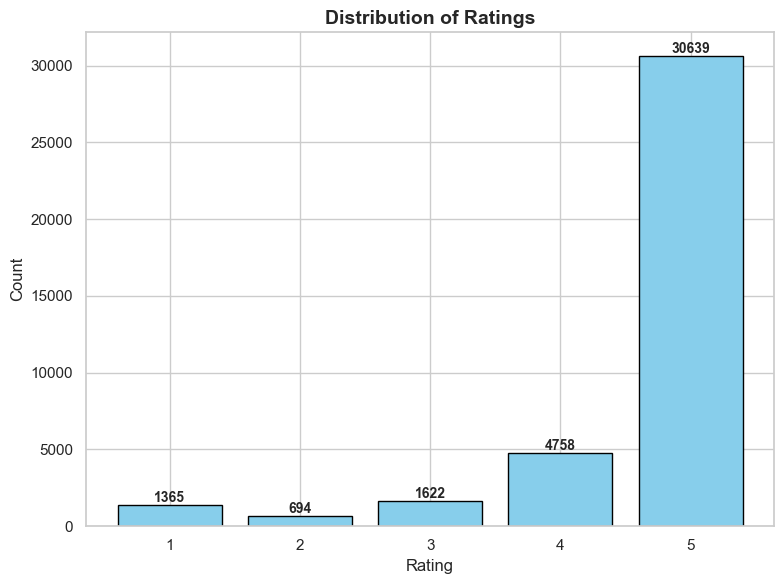

Distribution of Ratings:
Rating
1     1365
2      694
3     1622
4     4758
5    30639
Name: count, dtype: int64


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create a bar plot of ratings
plt.figure(figsize=(8, 6))
rating_counts = df['Rating'].value_counts().sort_index()
ax = plt.bar(rating_counts.index, rating_counts, color='skyblue', edgecolor='black')

# Set custom bar labels at the center of each bar
for bar in ax:
    bar_x = bar.get_x() + bar.get_width() / 2
    bar_height = bar.get_height()
    plt.text(bar_x, bar_height, str(int(bar_height)), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Distribution of Ratings', fontsize=14, fontweight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Print information about the distribution of ratings
print("Distribution of Ratings:")
print(rating_counts)


The distribution of ratings, as provided in the histogram results, offers insights into how customers have rated a product or service.

Here is a discussion and conclusion based on the given distribution:

**Distribution of Ratings:**
- The data is divided into five rating categories: 1, 2, 3, 4, and 5.
- Each category represents the number of reviews with that particular rating.
- The highest number of reviews falls into the 5-star category, with a count of 30,639.
- The 4-star rating is the second most common, with 4,758 reviews.
- The 3-star rating has a count of 1,622.
- The 2-star rating is the least common among positive ratings, with only 694 reviews.
- The lowest rating, 1 star, has a count of 1,365.

**Discussion:**
- The data clearly shows that the majority of customers have given positive ratings, with 5-star and 4-star ratings being the most prevalent. This indicates that a substantial portion of customers are satisfied with the product or service, as these ratings are above the median score (3).
- The distribution is right-skewed, meaning there are far more positive reviews than negative ones. This skew suggests that the product or service generally meets customer expectations or even exceeds them.
- The relatively low counts in the 1-star and 2-star categories suggest that only a minority of customers expressed strong dissatisfaction.
- The 3-star category, while not as common as 4-star and 5-star ratings, still has a notable number of reviews, indicating a moderate level of satisfaction.

**Conclusion:**
The distribution of ratings reflects a generally positive sentiment among customers who have left reviews. The bulk of reviews fall into the higher rating categories, suggesting that the product or service is well-received. However, the existence of lower ratings (1 to 3 stars) indicates that there is room for improvement or that a subset of customers had less positive experiences.

To draw more specific conclusions or make further decisions based on this data, it may be helpful to conduct sentiment analysis on the reviews themselves or to analyze other factors, such as the time of the reviews or the topics mentioned in the reviews. This additional context can provide a deeper understanding of customer feedback.

## NLP

#### Concatenate Review Title and Review Text Columns

In [27]:
columns_to_concat = ['Review Title', 'Review Text']

# Concatenate the selected columns into a new column 'Concatenated_Text'
df['Concatenated_Text'] = df[columns_to_concat].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

#### Text Preprocessing

Before performing NLP tasks, it's important to preprocess the text data, which typically involves removing stopwords, punctuation, and converting text to lowercase.

In [28]:
def preprocess_text(text):
    if isinstance(text, str):  # Check if the value is a string
        # Remove emojis from the text and store them separately
        emojis = [c for c in text if c in emoji.UNICODE_EMOJI]

        # Tokenize the text
        words = word_tokenize(text.lower())

        # Remove stopwords and punctuation
        words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]

        # Lemmatize words
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]

        # Combine words and emojis back into a preprocessed text
        preprocessed_text = ' '.join(words) + ' '.join(emojis)
        return preprocessed_text
    else:
        return ''  # Return an empty string for non-text values (NaN)

In [29]:
def preprocess_text(text):
    if isinstance(text, str):  # Check if the value is a string
        # Remove emojis from the text
        text = re.sub(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U0001FB00-\U0001FBFF\U0001FC00-\U0001FCFF\U0001FD00-\U0001FDFF\U0001FE00-\U0001FEFF\U0001FF00-\U0001FFFF]+', '', text)

        # Tokenize the text
        words = word_tokenize(text.lower())

        # Remove stopwords and punctuation
        words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]

        # Lemmatize words
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]

        return ' '.join(words)
    else:
        return ''  # Return an empty string for non-text values (NaN)

In [30]:
df['Cleaned_Concatenated_Text'] = df['Concatenated_Text'].apply(preprocess_text)

In [31]:
# Count the number of items in each text item
df['Text_Item_Count'] = df['Cleaned_Concatenated_Text'].apply(lambda x: len(x.split()))

# Display both the text and the count of text items
text_with_count = df[['Cleaned_Concatenated_Text', 'Text_Item_Count']]

print(text_with_count)

# Calculate the total number of text items across all rows
total_text_items = df['Text_Item_Count'].sum()

# Display the total number of text items
print(f"Total Text Items: {total_text_items}")

                               Cleaned_Concatenated_Text  Text_Item_Count
0                                  working better future                3
1                                                helpful                1
2              polite kind polite kind asked immediately                6
3      great customer service long wait time represen...               20
4      needed answer needed answer question concernin...               17
...                                                  ...              ...
39073  repayment hello reason giving fdr 1 star lates...               23
39074  glad working freedom helping debt starting dig...               17
39075  finally able take deep finally able take deep ...               11
39076  disappointed md recently wanted add old collec...               47
39077  best costumer service ever best costumer servi...               14

[39078 rows x 2 columns]
Total Text Items: 667447


In [32]:
all_words = ' '.join(df['Cleaned_Concatenated_Text']).split()

# Count the occurrences of each word
word_counts = Counter(all_words)

# Sort the word counts in descending order
sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

# Create a DataFrame for the first 50 most common words
word_counts_df = pd.DataFrame(list(sorted_word_counts.items()), columns=['Word', 'Count'])

print(word_counts_df.head(30))

          Word  Count
0         debt  24452
1      freedom  14265
2       relief  10969
3        great   9500
4         help   7680
5          fdr   7240
6      service   7171
7      helpful   6994
8      program   6569
9          far   6380
10       would   6334
11        good   6053
12       thank   5977
13         get   5716
14     company   5688
15      credit   4789
16        time   4666
17     account   4330
18         one   4204
19        work   4174
20    customer   3952
21    question   3865
22        call   3751
23     process   3729
24  settlement   3720
25       happy   3718
26  experience   3700
27        made   3391
28       month   3378
29   recommend   3378


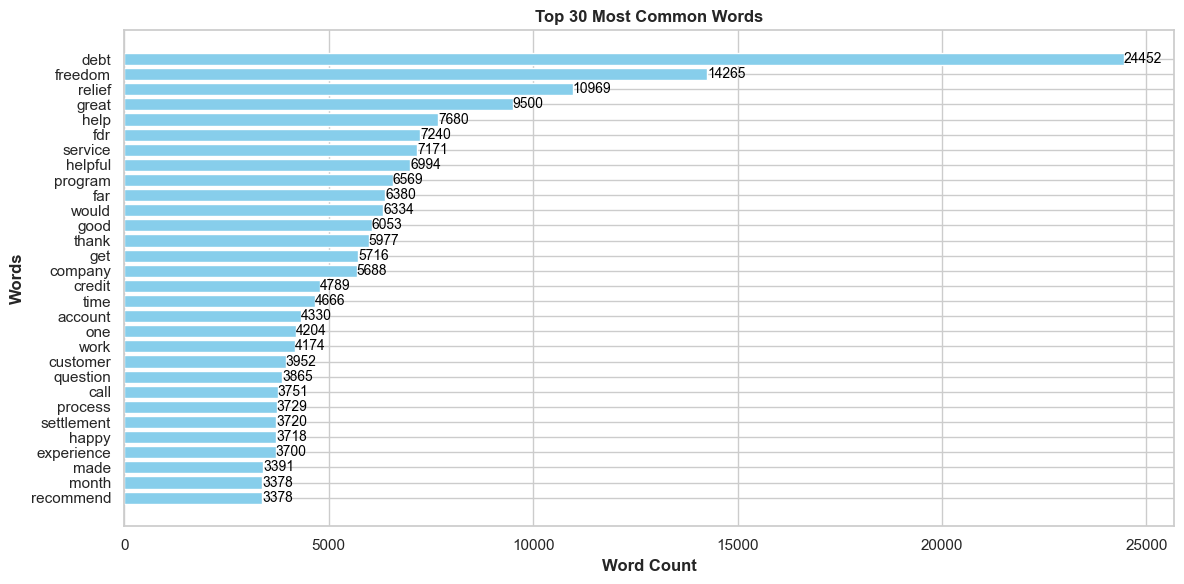

In [33]:
top_n = 30
top_words = list(sorted_word_counts.keys())[:top_n]
top_word_counts = list(sorted_word_counts.values())[:top_n]

plt.figure(figsize=(12, 6))
plt.barh(top_words, top_word_counts, color='skyblue')
plt.xlabel('Word Count', fontweight='bold')
plt.ylabel('Words', fontweight='bold')
plt.title(f'Top {top_n} Most Common Words', fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()

for i, count in enumerate(top_word_counts):
    plt.text(count, i, str(count), va='center', fontsize=10, color='black')

plt.show()

### Sentiment Analysis

Sentiment analysis helps determine the sentiment (positive, negative, or neutral) of text data. VADER or TextBlob libraries for sentiment analysis were used


Analyzing the relationship between Ratings and Review Text can involve sentiment analysis to derive a sentiment score from the text and see if it aligns with the given Ratings. 
Here's a step-by-step guide on how you can do this:

#### 1. Sentiment Analysis:
You can use a sentiment analysis tool or library to analyze the sentiment of the review text. There are various sentiment analysis libraries available in Python, such as NLTK, TextBlob, VADER, and spaCy. Choose one that you are comfortable with.



In [34]:
#For example, using TextBlob:

from textblob import TextBlob

def analyze_sentiment(Cleaned_Concatenated_Text):
    analysis = TextBlob(Cleaned_Concatenated_Text)
    # Classify sentiment as positive, negative, or neutral
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'


#### 2. Assign Sentiment Scores:
You can assign numerical sentiment scores to each review based on the sentiment analysis. For example, you might assign a score of 5 for 'positive,' 3 for 'neutral,' and 1 for 'negative.'

In [35]:
def assign_sentiment_score(sentiment):
    if sentiment == 'positive':
        return 5
    elif sentiment == 'neutral':
        return 3
    else:
        return 1


#### 3. Calculate a New Rating:
Calculate a new rating for each review based on the sentiment score derived from the review text. You can simply average the sentiment scores from the reviews. This will give you a new rating for each review.

In [36]:
def calculate_new_rating(sentiment_score):
    # You can customize this formula as needed
    return (sentiment_score * 5) / 3

#### 4.Compare Given and Calculated Ratings:
Once you have the calculated ratings, you can compare them with the given ratings to assess how well the sentiment analysis aligns with the reviewer's direct ratings.

In [37]:
def compare_ratings(given_rating, calculated_rating):
    # Calculate the difference between given and calculated ratings
    rating_difference = given_rating - calculated_rating
    return rating_difference


In [38]:
def analyze_sentiment(Cleaned_Concatenated_Text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = analyzer.polarity_scores(Cleaned_Concatenated_Text)
    return sentiment_scores

In [39]:
# Apply sentiment analysis to the 'Cleaned_Concatenated_Text' column
df['Sentiment_Scores'] = df['Cleaned_Concatenated_Text'].apply(analyze_sentiment)

# Extract the sentiment labels (positive, negative, neutral)
df['Sentiment_Label'] = df['Sentiment_Scores'].apply(lambda x: 'positive' if x['compound'] > 0 else ('negative' if x['compound'] < 0 else 'neutral'))

print("Sentiment Scores:")
print(df['Sentiment_Scores'])

print("\nSentiment Labels:")
print(df['Sentiment_Label'])

Sentiment Scores:
0        {'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...
1        {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
2        {'neg': 0.0, 'neu': 0.37, 'pos': 0.63, 'compou...
3        {'neg': 0.0, 'neu': 0.63, 'pos': 0.37, 'compou...
4        {'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'comp...
                               ...                        
39073    {'neg': 0.0, 'neu': 0.792, 'pos': 0.208, 'comp...
39074    {'neg': 0.179, 'neu': 0.394, 'pos': 0.427, 'co...
39075    {'neg': 0.0, 'neu': 0.559, 'pos': 0.441, 'comp...
39076    {'neg': 0.112, 'neu': 0.741, 'pos': 0.146, 'co...
39077    {'neg': 0.0, 'neu': 0.405, 'pos': 0.595, 'comp...
Name: Sentiment_Scores, Length: 39078, dtype: object

Sentiment Labels:
0        positive
1        positive
2        positive
3        positive
4        positive
           ...   
39073    positive
39074    positive
39075    positive
39076    positive
39077    positive
Name: Sentiment_Label, Length: 39078, dtype: object


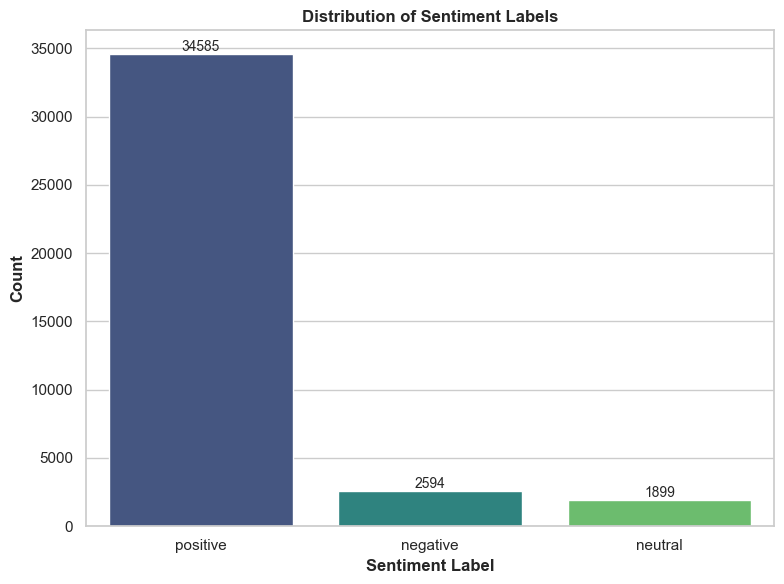

In [40]:
# Get the counts of each sentiment label
sentiment_counts = df['Sentiment_Label'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, hue=sentiment_counts.index, palette='viridis', legend=False)
plt.xlabel('Sentiment Label', weight='bold')
plt.ylabel('Count', weight='bold')
plt.title('Distribution of Sentiment Labels', fontsize=12, weight='bold')
plt.tight_layout()

for i, count in enumerate(sentiment_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

#### Topic Modeling

Topic modeling helps identify the main topics within a collection of documents. Latent Dirichlet Allocation (LDA) topic modeling using the Gensim library were used.

In [41]:
# Tokenize and preprocess text (using the 'Cleaned_Concatenated_Text' column)
tokenized_reviews = [word_tokenize(text) for text in df['Cleaned_Concatenated_Text']]

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(tokenized_reviews)
corpus = [dictionary.doc2bow(text) for text in tokenized_reviews]

# Train an LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Get topics and associated words
topics = lda_model.print_topics(num_words=5)

# Print the topics
for topic in topics:
    print(topic)


(0, '0.116*"great" + 0.078*"far" + 0.075*"good" + 0.040*"experience" + 0.036*"service"')
(1, '0.066*"helpful" + 0.042*"service" + 0.037*"question" + 0.030*"customer" + 0.029*"always"')
(2, '0.020*"account" + 0.019*"would" + 0.016*"call" + 0.013*"get" + 0.012*"time"')
(3, '0.036*"debt" + 0.034*"credit" + 0.023*"settlement" + 0.021*"month" + 0.021*"first"')
(4, '0.104*"debt" + 0.076*"freedom" + 0.057*"relief" + 0.031*"help" + 0.023*"thank"')


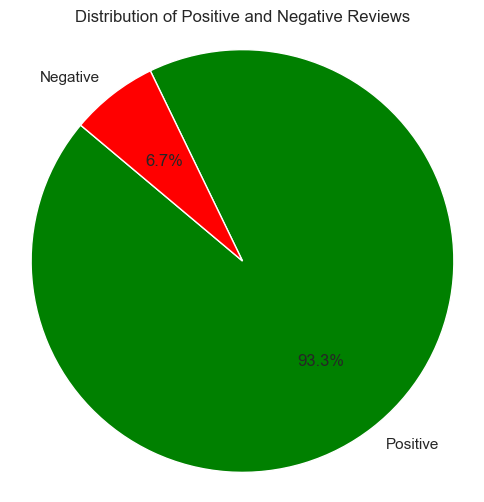

In [42]:
analyzer = SentimentIntensityAnalyzer()

# Define a function to classify reviews as positive, negative, or neutral
def classify_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    compound_score = sentiment_scores['compound']

    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment classification to the 'Cleaned_Concatenated_Text' column
df['Sentiment_Label'] = df['Cleaned_Concatenated_Text'].apply(classify_sentiment)

# Count the number of positive and negative reviews
positive_reviews_count = len(df[df['Sentiment_Label'] == 'Positive'])
negative_reviews_count = len(df[df['Sentiment_Label'] == 'Negative'])

# Create a pie chart to visualize the distribution of positive and negative reviews
labels = ['Positive', 'Negative']
sizes = [positive_reviews_count, negative_reviews_count]
colors = ['green', 'red']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Positive and Negative Reviews')
plt.axis('equal')

plt.show()

#### Sentiment Trends Over Time

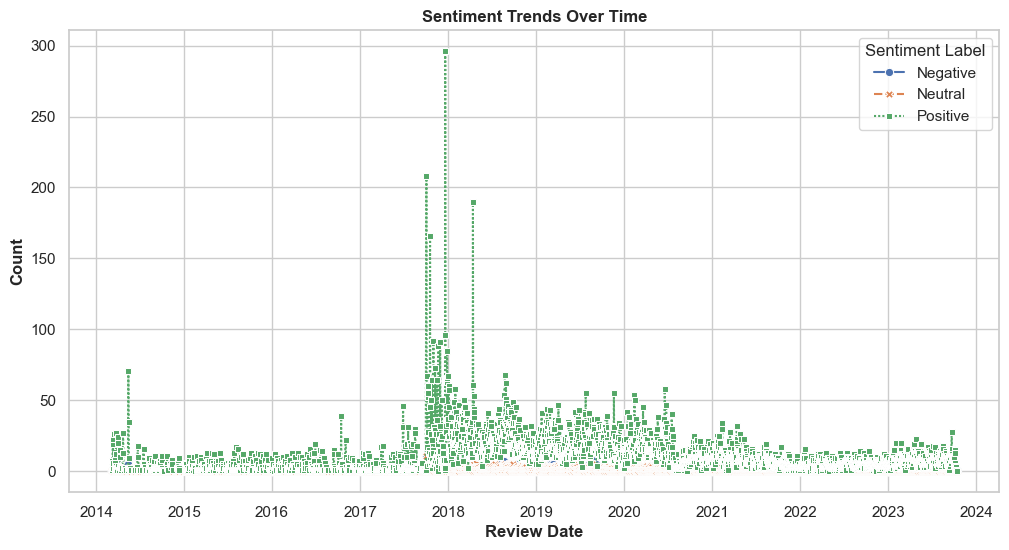

In [43]:
# Group the data by date and sentiment label, and count the occurrences
sentiment_trends = df.groupby(['Review Date', 'Sentiment_Label']).size().unstack(fill_value=0)

# Reset the index to have 'Date' as a column
sentiment_trends.reset_index(inplace=True)

# Set 'Date' column as the index for the DataFrame
sentiment_trends.set_index('Review Date', inplace=True)

# Plot the sentiment trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=sentiment_trends, markers=True)
plt.title('Sentiment Trends Over Time', weight='bold')
plt.xlabel('Review Date', weight='bold')
plt.ylabel('Count', weight='bold')
plt.legend(title='Sentiment Label', loc='upper right')
plt.grid(True)
plt.show()

In [44]:
# Group the data by date and sentiment label, and count the occurrences
sentiment_trends = df.groupby(['Review Date', 'Sentiment_Label']).size().unstack(fill_value=0)

# Reset the index to have 'Date' as a column
sentiment_trends.reset_index(inplace=True)

# Set 'Date' column as the index for the DataFrame
sentiment_trends.set_index('Review Date', inplace=True)

# Filter the DataFrame for only the "Negative" sentiment label
negative_sentiment_trends = sentiment_trends['Negative']

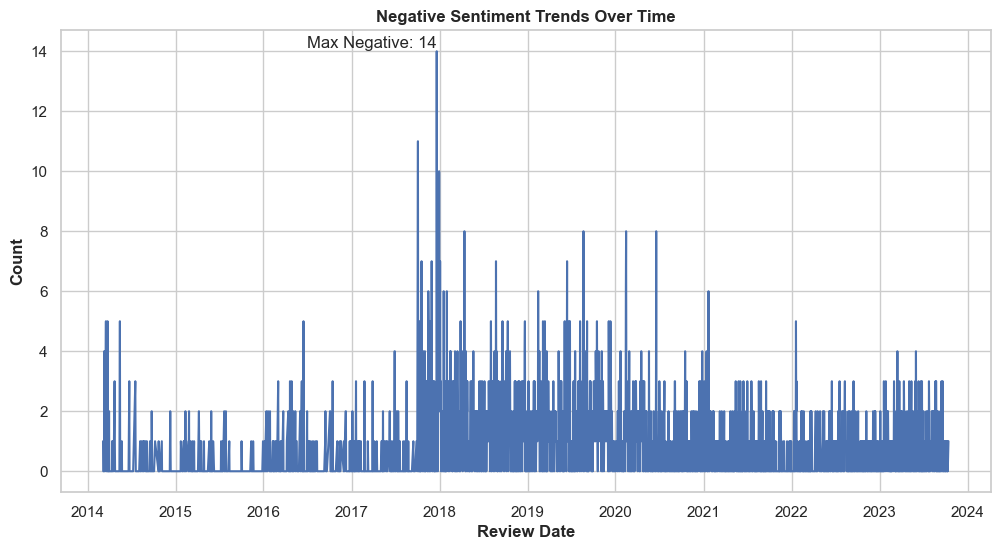

Top Negative Value: 14 on 2017-12-20 00:00:00


In [45]:
# Find the date with the highest negative sentiment count
max_negative_date = negative_sentiment_trends.idxmax()
max_negative_count = negative_sentiment_trends.max()

# Plot the negative sentiment trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=negative_sentiment_trends, markers=True)
plt.title('Negative Sentiment Trends Over Time', weight='bold')
plt.xlabel('Review Date', weight='bold')
plt.ylabel('Count', weight='bold')
plt.grid(True)

# Add text annotation for the top negative value
plt.text(max_negative_date, max_negative_count, f'Max Negative: {max_negative_count}', ha='right', va='bottom', fontsize=12)

plt.show()

# Print the top negative value and date
print(f"Top Negative Value: {max_negative_count} on {max_negative_date}")

#### Deep Learning Model

In [46]:
pip install gensim


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [50]:
from gensim.models import KeyedVectors

# Provide the path to your downloaded GloVe file
glove_file = '/Users/arifaygun/Desktop/ViewReview/FREEDOM DEBT RELIEF/glove_840B_300d.txt'

# Load the GloVe vectors
glove_model = KeyedVectors.load_word2vec_format(glove_file, binary=False)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/arifaygun/Desktop/ViewReview/FREEDOM DEBT RELIEF/glove_840B_300d.txt'

In [ ]:
def text_to_vector(text, model, num_features):
    words = text.split()
    feature_vector = np.zeros((num_features,), dtype="float32")
    n_words = 0
    for word in words:
        if word in model:
            n_words += 1
            feature_vector = np.add(feature_vector, model[word])
    if n_words > 0:
        feature_vector = np.divide(feature_vector, n_words)
    return feature_vector

In [ ]:
import pandas as pd
import numpy as np
from gensim.models import KeyedVectors
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load GloVe vectors
glove_file = 'path/to/glove.6B.100d.txt'
glove_model = KeyedVectors.load_word2vec_format(glove_file, binary=False)

# Load your dataset
data = pd.read_csv("your_dataset.csv")
text_data = data["Review Text"]
labels = data["Labels"]

# Text preprocessing, vectorization, and dataset splitting

# Build and compile your deep learning model
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=100, weights=[embedding_matrix], input_length=max_length, trainable=False))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train and evaluate your model
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2)
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))